# Beta Bank    

El presente ejercicio tiene como finalidad desarrollar un modelo que permita indicar si un cliente se irá o no de Beta Bank.

## Descarga de librerías y dataframe    

### Librerías y herramientas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_curve, precision_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

### Dataframe    
Se importa dataframe y se examinan datos para su preparación. 

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Conclusiones**    
Hay tres columnas que son object, por lo que serán preprocesadas para que se vuelvan valor numérico y no afecte los cálculos posteriores. Asimismo, los valores Nan que hay en Tenure se sustituirán por la mediana del rango que hay en la misma columna para evitar problemas posteriores al poner a prueba los modelos. 

## Preprocesamiento de datos   
Se llevan a cabo los cambios señalados en la sección previa para el correcto consecuente análisis y funcionamiento de modelos. 

### Preprocesamiento de datos tipo "Object"

In [4]:
df['Surname'] = pd.get_dummies(df['Surname'], drop_first=True)
df['Geography'] = pd.get_dummies(df['Geography'], drop_first=True)
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  uint8  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  uint8  
 5   Gender           10000 non-null  uint8  
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), uint8(3)
memory usage: 888.8 KB


### Nan a mediana

In [6]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [7]:
print(df['Tenure'].isna().sum())

0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial de los datos y la carga de lo necesario para trabajarlos
</div>

## Segmentación    
Se segmenta el dataframe de la siguiente manera:    
-20% para la prueba final   
-20% para validación  
-60% para entrenamiento   

Se inicia con la segmentación del 20% de prueba.

In [8]:
x = df.drop(['Exited'], axis=1)
y = df['Exited']

x_temporal, x_prueba, y_temporal, y_prueba = train_test_split(x, y, test_size=0.2, random_state=12345)

In [9]:
print('El tamaño de x_temporal es', x_temporal.shape)
print('El tamaño de y_temporal es', y_temporal.shape)
print('El tamaño de x_prueba es', x_prueba.shape)
print('El tamaño de y_prueba es', y_prueba.shape)

El tamaño de x_temporal es (8000, 13)
El tamaño de y_temporal es (8000,)
El tamaño de x_prueba es (2000, 13)
El tamaño de y_prueba es (2000,)


Ahora se dividen en validación y entrenamiento usando x y y temporal. "ent" es entrenamiento, mientras "val" es validación. 

In [10]:
x_ent, x_val, y_ent, y_val = train_test_split(x_temporal, y_temporal, test_size=0.25, random_state=12345)

In [11]:
print('El tamaño de x_ent es', x_ent.shape)
print('El tamaño de y_ent es', y_ent.shape)
print('El tamaño de x_val es', x_val.shape)
print('El tamaño de y_val es', y_val.shape)

El tamaño de x_ent es (6000, 13)
El tamaño de y_ent es (6000,)
El tamaño de x_val es (2000, 13)
El tamaño de y_val es (2000,)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, con esto tienes los datos listos para pasar al entrenamiento de tus modelos
</div>

## Entrenamiento de modelos sin considerar desequilibrio de clases   
Se entrenan modelos sin considerar el desequilibrio de clases. 

**Decision tree Classifier**

In [12]:
model_decision = DecisionTreeClassifier(random_state=12345)
model_decision.fit(x_ent, y_ent)

predicted_val = model_decision.predict(x_val)
print('La precisión de este modelo es', accuracy_score(y_val, predicted_val))
print('El valor de recall es', recall_score(y_val, predicted_val))
print('El valor de precision es', precision_score(y_val, predicted_val))
print('El valor de F1 es', f1_score(y_val, predicted_val))

La precisión de este modelo es 0.789
El valor de recall es 0.48081841432225064
El valor de precision es 0.4619164619164619
El valor de F1 es 0.4711779448621554


A pesar de que la precisión del modelo indica que no parece ser tan malo, los otros datos nos señalan lo contrario. Recall nos indica que sólo detecta el 48% de los usuarios que sí se van, mientras que recall nos señala que su confiabilidad es del 46%. Así obtenemos que el modelo tiene sólo un 47% de confiabilidad, según el valor F1. Esto indica que las clases están desbalanceadas.   

El siguiente paso será usar dos enfoques para corregir el desequilibrio de clases y se entrenarán modelos para encontrar la mejor opción de parámetros y modelo a usar.

**Logistic Regression**

In [13]:
model_logistic = LogisticRegression(random_state=12345, solver='liblinear')
model_logistic.fit(x_ent, y_ent)

log_predict = model_logistic.predict(x_val)

print('La precisión de este modelo es', accuracy_score(y_val, log_predict))
print('El valor de recall es', recall_score(y_val, log_predict))
print('El valor de precision es', precision_score(y_val, log_predict))
print('El valor de F1 es', f1_score(y_val, log_predict))

La precisión de este modelo es 0.8045
El valor de recall es 0.0
El valor de precision es 0.0
El valor de F1 es 0.0


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo, a pesar de predecir correctamente el 80% de los casos, el desbalance produce resultados totalmente inutilizables. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuidado con el análisis de los modelos sólo por la precisión, al tener datos desbalanceados cómo la clase minoritaria no representa una gran muestra de tus datos la precisión será alta pero no necesariamente quiere decir que predice correctamente, sólo está generando predicciones para la clase mayoritaria.
</div>

## Enfoques para corregir desequilibrio de clases    
Ahora se crean las variables para la corrección de desequilibrio de clases que se usarán para el entrenamiento de modelos y la elección del más adecuado para predecir si los clientes del banco decidirán irse o no.

**Escalado para logistic regression**

In [14]:
df.max()

RowNumber             10000.00
CustomerId         15815690.00
Surname                   1.00
CreditScore             850.00
Geography                 1.00
Gender                    1.00
Age                      92.00
Tenure                   10.00
Balance              250898.09
NumOfProducts             4.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      199992.48
Exited                    1.00
dtype: float64

In [15]:
df.min()

RowNumber                 1.00
CustomerId         15565701.00
Surname                   0.00
CreditScore             350.00
Geography                 0.00
Gender                    0.00
Age                      18.00
Tenure                    0.00
Balance                   0.00
NumOfProducts             1.00
HasCrCard                 0.00
IsActiveMember            0.00
EstimatedSalary          11.58
Exited                    0.00
dtype: float64

Con base en los máximos y mínimos, las columnas que serán escaladas son:   
-CreditScore   
-Age   
-Balance   
-EstimatedSalary

In [16]:
x_ent_copy = x_ent.copy()
x_valid_copy = x_val.copy()

numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(x_ent_copy[numeric])

x_ent_copy[numeric] = scaler.transform(x_ent_copy[numeric])
x_valid_copy[numeric] = scaler.transform(x_valid_copy[numeric])

In [17]:
print(x_ent_copy.head())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  \
492         493    15624170        0    -0.134048          0       0   
6655       6656    15703763        0    -1.010798          0       1   
4287       4288    15657529        0     0.639554          1       1   
42           43    15687946        0    -0.990168          0       0   
8178       8179    15809654        0     0.567351          0       0   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
492  -0.078068     4.0  0.076163              2          0               1   
6655  0.494555     5.0  0.136391              1          1               1   
4287  1.353490     1.0  0.358435              1          1               1   
42    2.116987     2.0  0.651725              1          1               1   
8178  0.685430     7.0  0.813110              2          1               1   

      EstimatedSalary  
492          0.331571  
6655        -0.727858  
4287        -0.477006  
42

**Sobremuestreo**

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, siempre en problemas de clasificación se debe revisar el balance en las clases de la variable objetivo
</div>

Para el sobremuestreo, la cantidad de repeiticiones será de 4 dada la relación de 0 y 1 en la columna. 

In [19]:
def sobremuestreo (características, objetivo, repetición):
    ent_cero = x_ent[y_ent == 0]
    ent_uno = x_ent[y_ent == 1]
    obj_cero = y_ent[y_ent == 0]
    obj_uno = y_ent[y_ent == 1]
    
    sobremuestra_ent = pd.concat([ent_cero] + [ent_uno] * repetición)
    sobremuestra_obj = pd.concat([obj_cero] + [obj_uno] * repetición)
    
    sobremuestra_ent, sobremuestra_obj = shuffle(sobremuestra_ent, sobremuestra_obj, random_state=12345)
    
    return sobremuestra_ent, sobremuestra_obj

sobremuestra_ent, sobremuestra_obj = sobremuestreo(x_ent, x_val, 4)

**Submuestreo**   
El submuestreo se hará con frac de .1.

In [20]:
def submuestreo (características, objetivo, fracción):
    ent_cero = x_ent[y_ent == 0]
    ent_uno = x_ent[y_ent == 1]
    obj_cero = y_ent[y_ent == 0]
    obj_uno = y_ent[y_ent == 1]
    
    ent_sub = pd.concat([ent_cero.sample(frac=0.2, random_state=12345), ent_uno])
    obj_sub = pd.concat([obj_cero.sample(frac=0.2, random_state=12345), obj_uno])
    
    ent_sub, obj_sub = shuffle(ent_sub, obj_sub, random_state=12345)
    
    return ent_sub, obj_sub

ent_sub, obj_sub = submuestreo(x_ent, y_ent, 0.1)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Utilizar sobremuestreo o submuestreo o el balanceo de clases en los parámetros del modelo puede ayudar a los modelos a "entender" cómo hacer las predicciones, también te puedes apoyar de los parámetros de los modelos para mejorar estos resultados
</div>

## Reaplicación de modelos con métricas para corregir desequilibrio de clases.

### Decision tree classifier   
Se reaplica decision tree classifier usando sobremuestreo, submuestreo y ajuste de peso de clase. Empero, primero se elige el mejor valor para max_depth.

**max_depth**

In [21]:
mejor_exactitud = 0
mejor_profundidad = None

for i in range (1,21):
    modelo_depth = DecisionTreeClassifier(random_state=12345, max_depth=i)
    modelo_depth.fit(x_ent, y_ent)
    
    modelo_depth_pred = modelo_depth.predict(x_ent)
    modelo_depth_val = modelo_depth.predict(x_val)
    
    exactitud_pred = accuracy_score(y_ent, modelo_depth_pred)
    exactitud_val = accuracy_score(y_val, modelo_depth_val)
    
    if exactitud_val > mejor_exactitud:
        mejor_exactitud = exactitud_val
        mejor_profundidad = i
        
print('La mejor exactitud es:', mejor_exactitud)
print('El mejor max_depth es:', mejor_profundidad)

La mejor exactitud es: 0.8595
El mejor max_depth es: 6


**Ajuste de peso de clase**

La precisión de este modelo es 0.7815
El valor de F1 es 0.5590312815338043
AUC-ROC es 0.8115571139959213


<function matplotlib.pyplot.show(close=None, block=None)>

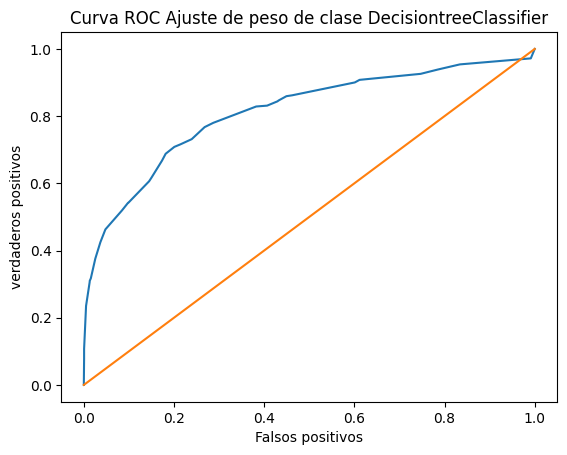

In [22]:
model_decision_balanced = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=6)
model_decision_balanced.fit(x_ent, y_ent)

predicted_val = model_decision_balanced.predict(x_val)

y_scores =model_decision_balanced.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
auc_roc = roc_auc_score(y_val, y_scores)

print('La precisión de este modelo es', accuracy_score(y_val, predicted_val))
print('El valor de F1 es', f1_score(y_val, predicted_val))
print('AUC-ROC es', auc_roc)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC Ajuste de peso de clase DecisiontreeClassifier')
plt.show

Hay una clara mejoría en cuanto a haber hecho el modelo sin ajuste de peso. 

**Sobremuestreo**

La precisión de este modelo es 0.7815
El valor de F1 es 0.5590312815338043
AUC-ROC es 0.8115571139959213


<function matplotlib.pyplot.show(close=None, block=None)>

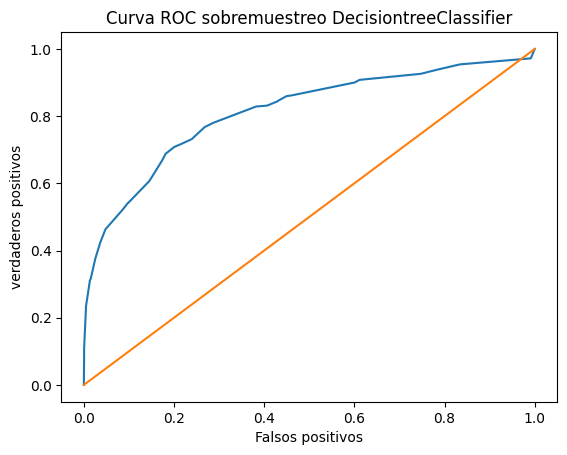

In [23]:
model_decision_sobre = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_decision_sobre.fit(sobremuestra_ent, sobremuestra_obj)

predicted_val_sobre = model_decision_sobre.predict(x_val)

y_scores_sobre = model_decision_sobre.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_scores_sobre)
auc_roc_sobre = roc_auc_score(y_val, y_scores_sobre)

print('La precisión de este modelo es', accuracy_score(y_val, predicted_val_sobre))
print('El valor de F1 es', f1_score(y_val, predicted_val_sobre))
print('AUC-ROC es', auc_roc_sobre)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC sobremuestreo DecisiontreeClassifier')
plt.show

El resultado de esta prueba es apenas un punto porcentual mejor que la anterior, lo cual, conlleva el mismo problema. 

**Submuestreo**

La precisión de este modelo es 0.7425
El valor de F1 es 0.5364536453645364
AUC-ROC es 0.8111772176647024


<function matplotlib.pyplot.show(close=None, block=None)>

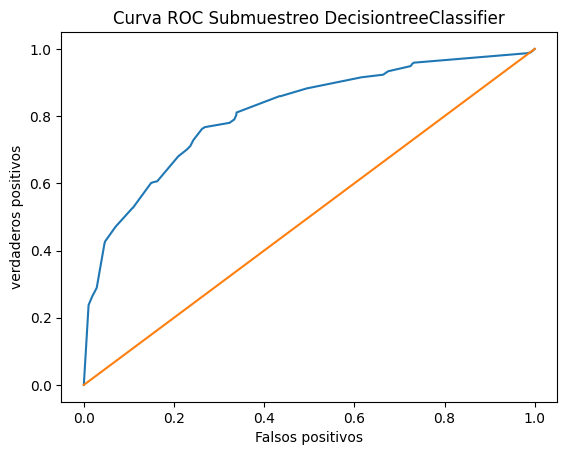

In [24]:
model_decision_sub = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_decision_sub.fit(ent_sub, obj_sub)

predicted_val_sub = model_decision_sub.predict(x_val)

y_scores_sub = model_decision_sub.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_scores_sub)
auc_roc_sub = roc_auc_score(y_val, y_scores_sub)

print('La precisión de este modelo es', accuracy_score(y_val, predicted_val_sub))
print('El valor de F1 es', f1_score(y_val, predicted_val_sub))
print('AUC-ROC es', auc_roc_sub)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC Submuestreo DecisiontreeClassifier')
plt.show

El rendimiento de DecisionTreeClassifier es menos confiable con submuestreo que con sobremuestreo con max_depth=6.

### LogisticRegression

**Escalado**

La precisión de este modelo es 0.8045
El valor de F1 es 0.0
El valor de AUC-ROC es 0.5244635752536484


<function matplotlib.pyplot.show(close=None, block=None)>

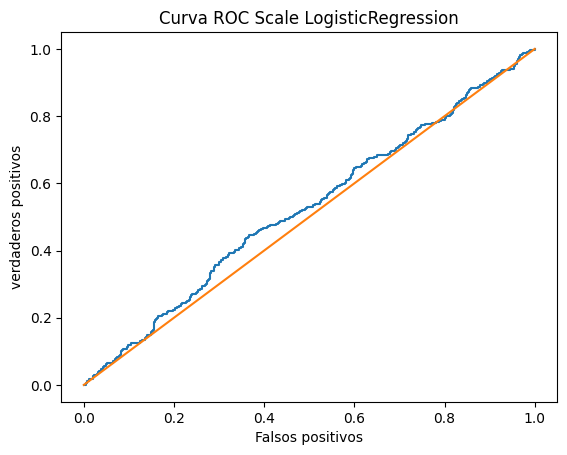

In [25]:
model_logistic_es = LogisticRegression(random_state=12345, solver='liblinear')
model_logistic_es.fit(x_ent_copy, y_ent)

log_predict_es = model_logistic_es.predict(x_valid_copy)
y_prob_1 = model_logistic_es.predict_proba(x_valid_copy)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob_1)
auc_score_log_es = roc_auc_score(y_val, y_prob_1)

print('La precisión de este modelo es', accuracy_score(y_val, log_predict_es))
print('El valor de F1 es', f1_score(y_val, log_predict_es))
print('El valor de AUC-ROC es', auc_score_log_es)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC Scale LogisticRegression')
plt.show

Al considerar la curva roc, el modelo de regresión linear con escalada de características, no es confiable. 

**Sobremuestre**

La precisión de este modelo es 0.497
El valor de F1 es 0.32663989290495316
El valor de AUC-ROC es 0.5500914771291282


<function matplotlib.pyplot.show(close=None, block=None)>

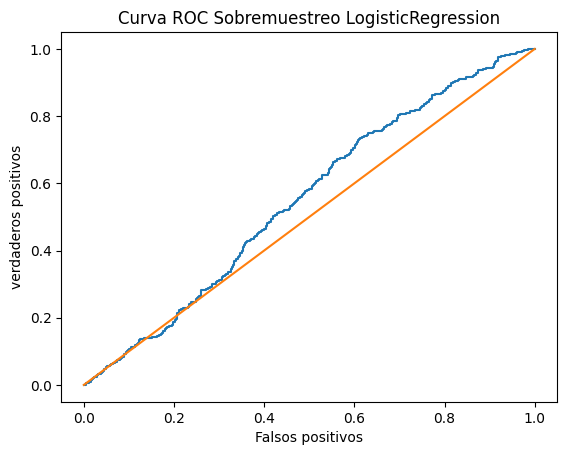

In [26]:
model_logistic_sobre = LogisticRegression(random_state=12345, solver='liblinear')
model_logistic_sobre.fit(sobremuestra_ent, sobremuestra_obj)

log_predict_sobre = model_logistic_sobre.predict(x_val)
y_prob_1_sobre = model_logistic_sobre.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob_1_sobre)
auc_score_log_sobre = roc_auc_score(y_val, y_prob_1_sobre)

print('La precisión de este modelo es', accuracy_score(y_val, log_predict_sobre))
print('El valor de F1 es', f1_score(y_val, log_predict_sobre))
print('El valor de AUC-ROC es', auc_score_log_sobre)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC Sobremuestreo LogisticRegression')
plt.show

El modelo de regresión linear con sobremuestreo, da mejores resultados que con escalado, pero aún así no es caonfiable. 

**Submuestreo**

La precisión de este modelo es 0.461
El valor de F1 es 0.3370233702337023
El valor de AUC-ROC es 0.549210880612412


<function matplotlib.pyplot.show(close=None, block=None)>

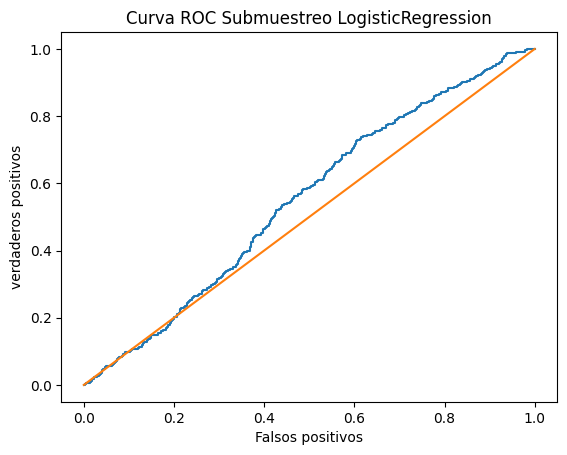

In [27]:
model_logistic_sub = LogisticRegression(random_state=12345, solver='liblinear')
model_logistic_sub.fit(ent_sub, obj_sub)

log_predict_sub = model_logistic_sub.predict(x_val)
y_prob_1_sub = model_logistic_sub.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob_1_sub)
auc_score_log_sub = roc_auc_score(y_val, y_prob_1_sub)

print('La precisión de este modelo es', accuracy_score(y_val, log_predict_sub))
print('El valor de F1 es', f1_score(y_val, log_predict_sub))
print('El valor de AUC-ROC es', auc_score_log_sub)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC Submuestreo LogisticRegression')
plt.show

LogisticRegression con submuestreo, no muestra mayor confiabilidad que con sobremuestreo. 

## Modelo a usar: DecisionTreeClassifier con sobremuestreo   
Ahora usamos los datos de prueba para ver efectividad del modelo y brindar predicciones confiables.

La precisión de este modelo es 0.7735
El valor de F1 es 0.5907859078590786
AUC-ROC es 0.8350412627610839


<function matplotlib.pyplot.show(close=None, block=None)>

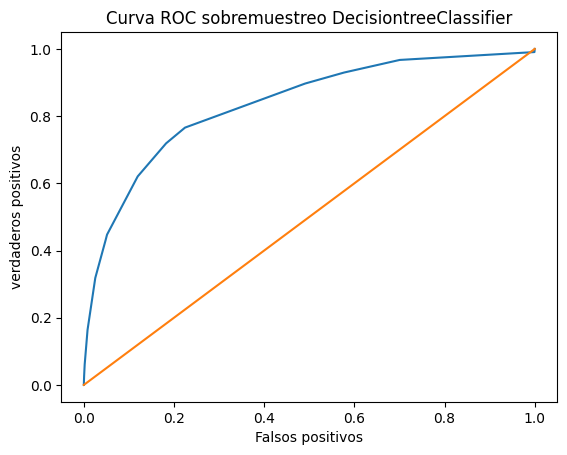

In [28]:
model_decision_final = DecisionTreeClassifier(random_state=12345, max_depth=4)
model_decision_final.fit(sobremuestra_ent, sobremuestra_obj)

predicted_val_final = model_decision_final.predict(x_prueba)

y_scores_final = model_decision_final.predict_proba(x_prueba)[:, 1]
fpr, tpr, thresholds = roc_curve(y_prueba, y_scores_final)
auc_roc_final = roc_auc_score(y_prueba, y_scores_final)

print('La precisión de este modelo es', accuracy_score(y_prueba, predicted_val_final))
print('El valor de F1 es', f1_score(y_prueba, predicted_val_final))
print('AUC-ROC es', auc_roc_final)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('Falsos positivos')
plt.ylabel('verdaderos positivos')
plt.title('Curva ROC sobremuestreo DecisiontreeClassifier')
plt.show

## Conclusión

El modelo entrenado nos permite identificar y cuantificar la probabilidad de que los clientes abandonen el banco.   
La precisión del modelo es del 77%, dicho porcentaje es de los casos predichos correctamente. El valor AUC-ROC es de .835, lo que quiere decir que puede diferenciar eficientemente a los clientes que se van y a los que se quedan. Finalmente, el valor de F1 nos permite saber que el modelo tiene una capacidad decente para identificar correctamente a los clientes que probablemente se irían.   
Este modelo podría ser una herramienta que permita tomar decisiones estratégicas: una vez que se han identificado a los clientes de alto riesgo de abandono, se pueden generar programas de fidelidad, ofertas personalizadas o intervenciones para mejorar su experiencia con el banco y evitar su abandono. 

In [29]:
se_van = sum(predicted_val_final ==1)
total_clientes = len(predicted_val_final)
porcentaje = se_van/total_clientes

print('Porcentaje de clientes que se irían según el modelo es de:', porcentaje * 100)

Porcentaje de clientes que se irían según el modelo es de: 34.0


Lo que sería óptimo de llevarse a cabo sería detectar los factores que afectan a los clientes y los motivarían a abandonar el banco, y llevar a cabo acciones precisas e individuales para evitar su salida. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Sergio, se nota que conoces las métricas de evaluación y planteas conclusiones muy acertadas en cuanto a los resultados. Es importante siempre en un problema de ML identificar el balance entre las clases de tu variable objetivo para poder escoger la métrica correcta ya que para datasets desbalanceados la métrica de accuracy suele presentar buenos valores pero en realidad las predicciones no son buenas y es por la forma en cómo se calcula esta métrica que puede llevar a interpretaciones erroneas en cambio el f1-score es la ideal para este tipo de casos ya que maneja mejor este tipo de problemas.
    
    
Saludos!
</div>